# Softmax,  log_softmax, NLLLoss and CrossEntropy

## What is Sofmax

**函数Softmax(x)**: 输入一个实数向量并返回一个概率分布。定义 x 是一个实数的向量(正数或负数都可以)。 然后, 第i个 Softmax(x) 的计算方式为：
$$\frac{{\exp ({x_i})}}{{\sum\nolimits_j {\exp ({x_j})} }}$$

输出是一个概率分布: 每个元素都是非负的, 并且所有元素的总和都是1

In [1]:
import torch
import torch.nn.functional as F

torch.manual_seed(0)

**在图片分类问题中，输入m张图片，输出一个m\*N的Tensor，其中N是分类类别总数。比如输入2张图片，分三类，最后的输出是一个2*3的Tensor，举个例子：**

In [2]:
output = torch.randn(2, 3)
print(output)

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986]])


第1,2行分别是第1,2张图片的结果，假设第123列分别是猫、狗和猪的分类得分。

可以看出模型认为两张都更可能是猫。
然后对每一行使用Softmax，这样可以得到每张图片的概率分布。

In [3]:
print(F.softmax(output, dim=1))
# 这里dim的意思是计算Softmax的维度，这里设置dim=1，可以看到每一行的加和为1。

tensor([[0.8446, 0.1349, 0.0205],
        [0.7511, 0.1438, 0.1051]])


## What is log_softmax

这个很好理解，其实就是对softmax处理之后的结果执行一次对数运算。

可以理解为 log(softmax(output))

In [4]:
print(F.log_softmax(output, dim=1))
print(torch.log(F.softmax(output, dim=1)))
# 输出结果是一致的

tensor([[-0.1689, -2.0033, -3.8886],
        [-0.2862, -1.9392, -2.2532]])
tensor([[-0.1689, -2.0033, -3.8886],
        [-0.2862, -1.9392, -2.2532]])


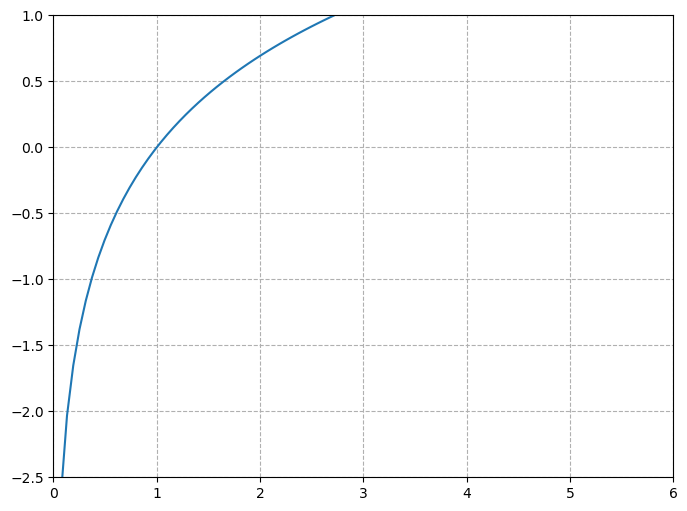

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 创建x和y数据
x = np.linspace(0.01, 6, 100) # 将起始值改为0.01,避免除零错误
y = np.log(x)

# 设置图像大小
plt.figure(figsize=(8, 6))

# 绘制曲线
plt.plot(x, y)

# 设置x轴和y轴范围
plt.xlim(0, 6)
plt.ylim(-2.5, 1)

# 设置坐标轴刻度
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(-2.5, 1.5, 0.5))

# 显示网格
plt.grid(linestyle='--')

# 显示图像
plt.show()

## What is NLLLoss？

该函数的全称是negative log likelihood loss. 若$x_i=[q_1, q_2, ..., q_N]$ 为神经网络对第i个样本的输出值，$y_i$为真实标签。则：
$$f(x_i,y_i)=-q_{y_i}$$

输入：log_softmax(output), target

In [6]:
print(F.nll_loss(torch.tensor([[-1.2, -2, -3]]), torch.tensor([0])))

tensor(1.2000)


### 通常我们结合 log_softmax 和 nll_loss一起用

In [7]:
output = torch.tensor([[1.2, 2, 3]])

target = torch.tensor([0])
log_sm_output = F.log_softmax(output, dim=1)
print('Output is [1.2, 2, 3]. If the target is 0, loss is:', F.nll_loss(log_sm_output, target))

target = torch.tensor([1])
log_sm_output = F.log_softmax(output, dim=1)
print('Output is [1.2, 2, 3]. If the target is 1, loss is:', F.nll_loss(log_sm_output, target))

target = torch.tensor([2])
log_sm_output = F.log_softmax(output, dim=1)
print('Output is [1.2, 2, 3]. If the target is 2, loss is:', F.nll_loss(log_sm_output, target))

Output is [1.2, 2, 3]. If the target is 0, loss is: tensor(2.2273)
Output is [1.2, 2, 3]. If the target is 1, loss is: tensor(1.4273)
Output is [1.2, 2, 3]. If the target is 2, loss is: tensor(0.4273)


##  在分类问题中，CrossEntropy等价于log_softmax 结合 nll_loss

$N$分类问题，对于一个特定的样本，已知其真实标签，CrossEntropy的计算公式为：

$$cross\_entropy=-\sum_{k=1}^{N}\left(p_{k} * \log q_{k}\right)$$

其中p表示真实值，在这个公式中是one-hot形式；**q是经过softmax计算后的结果， $q_k$为神经网络认为该样本为第$k$类的概率。**

仔细观察可以知道，因为p的元素不是0就是1，而且又是乘法，所以很自然地我们如果知道1所对应的index，那么就不用做其他无意义的运算了。所以在pytorch代码中target不是以one-hot形式表示的，而是直接用scalar表示。若该样本的真实标签为$y$,则交叉熵的公式可变形为：

$$cross\_entropy=-\sum_{k=1}^{N}\left(p_{k} * \log q_{k}\right)=-log \, q_{y}$$

In [8]:
output = torch.tensor([[1.2, 2, 3]])
target = torch.tensor([0])

log_sm_output = F.log_softmax(output, dim=1)
nll_loss_of_log_sm_output = F.nll_loss(log_sm_output, target)
print(nll_loss_of_log_sm_output)

tensor(2.2273)


In [9]:
output = torch.tensor([[1.2, 2, 3]])
target = torch.tensor([0])

ce_loss = F.cross_entropy(output, target)
print(ce_loss)

tensor(2.2273)


# More about softmax

[0.02590865 0.11611453 0.85797681]
[0.22916797 0.3093444  0.46148762]
[0.33327778 0.33332777 0.33339445]


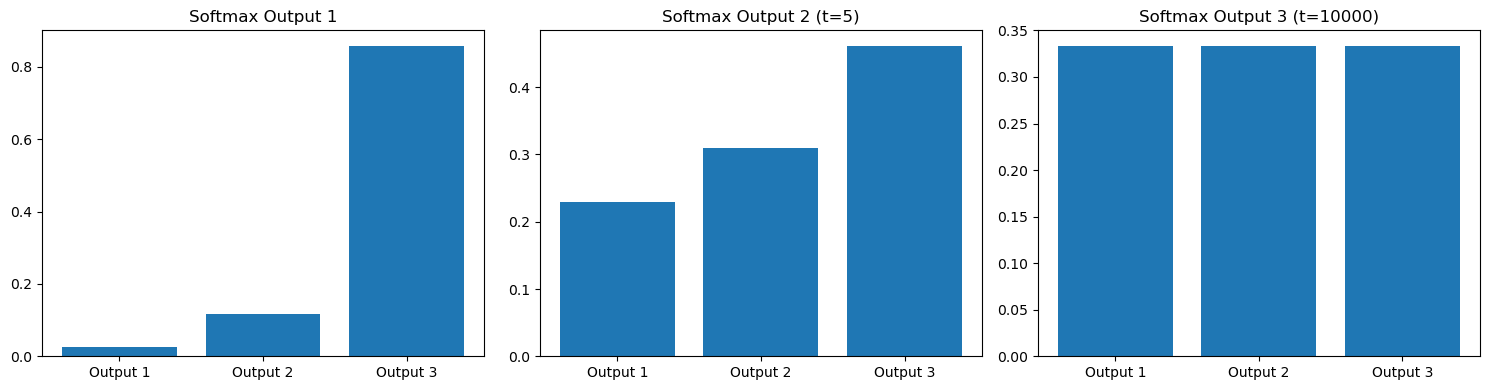

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):#定义一个普通的softmax函数
    x_exp = np.exp(x)
    return x_exp / np.sum(x_exp)

def softmax_t(x, t):#定义一个带有温度参数的softmax函数
    x_exp = np.exp(x / t)
    return x_exp / np.sum(x_exp)

output = np.array([0.1, 1.6, 3.6])#定义一个输出向量

softmax_output1 = softmax(output)
softmax_output2 = softmax_t(output, 5)
softmax_output3 = softmax_t(output, 10000)

print(softmax_output1)
print(softmax_output2)
print(softmax_output3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].bar(range(len(softmax_output1)), softmax_output1)
axes[0].set_xticks(range(len(softmax_output1)))
axes[0].set_xticklabels(['Output 1', 'Output 2', 'Output 3'])
axes[0].set_title('Softmax Output 1')

axes[1].bar(range(len(softmax_output2)), softmax_output2)
axes[1].set_xticks(range(len(softmax_output2)))
axes[1].set_xticklabels(['Output 1', 'Output 2', 'Output 3'])
axes[1].set_title('Softmax Output 2 (t=5)')

axes[2].bar(range(len(softmax_output3)), softmax_output3)
axes[2].set_xticks(range(len(softmax_output3)))
axes[2].set_xticklabels(['Output 1', 'Output 2', 'Output 3'])
axes[2].set_title('Softmax Output 3 (t=10000)')

plt.tight_layout()
plt.show()